In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import compute_eer, compute_eer_2
import numpy as np
from my_conf_inter import evaluate_with_conf_int
import warnings
warnings.filterwarnings("ignore")


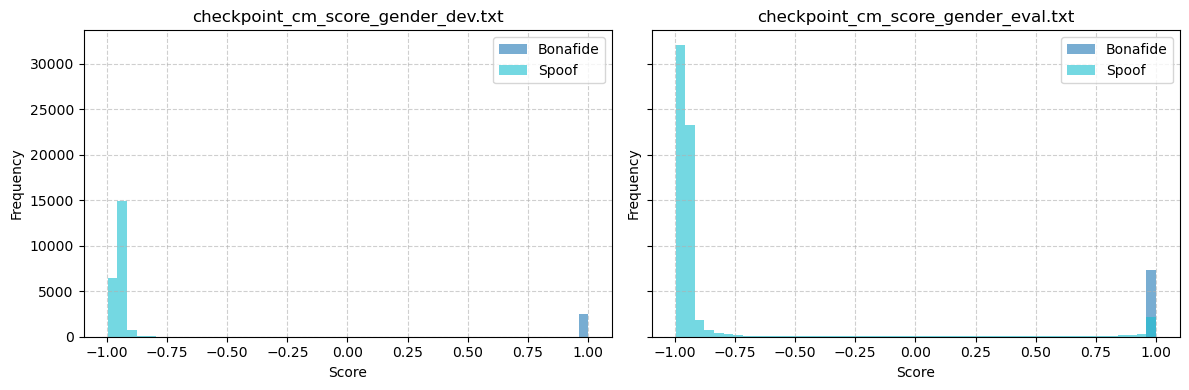

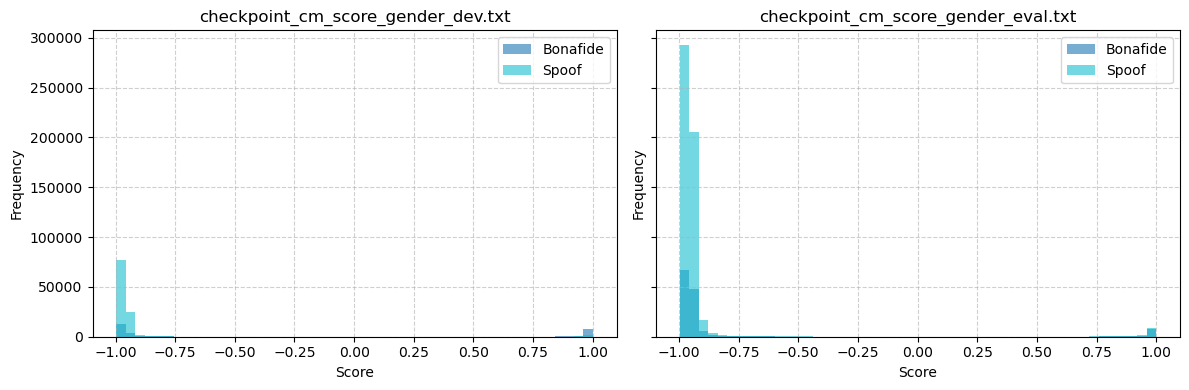

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram_comparison(file_paths, gender="all"):
    num_files = len(file_paths)
    cols = 2  # Number of columns in the subplot grid
    rows = (num_files + cols - 1) // cols  # Calculate required rows
    unique_colors = plt.cm.get_cmap("tab10", 2)  # Use 2 colors for bonafide & spoof

    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for idx, file_path in enumerate(file_paths):
        df = pd.read_csv(file_path, delim_whitespace=True, header=None,
                         names=["file_id", "speakers", "attack_type", "label", "score", "gender"])

        mapping_labels = {"bonafide": 1, "spoof": -1}
        df["label"] = df["label"].map(mapping_labels)

        if gender == "male":
            df = df.loc[df["gender"] == "male"]
        elif gender == "female":
            df = df.loc[df["gender"] == "female"]

        # Separate bonafide and spoof scores
        bonafide_scores = df[df["label"] == 1]["score"]
        spoof_scores = df[df["label"] == -1]["score"]

        # Plot histograms
        axes[idx].hist(bonafide_scores, bins=50, alpha=0.6, color=unique_colors(0), label="Bonafide")
        axes[idx].hist(spoof_scores, bins=50, alpha=0.6, color=unique_colors(1), label="Spoof")
        
        # Formatting
        axes[idx].set_title(file_path.split("/")[-1], fontsize=12)
        axes[idx].set_xlabel("Score", fontsize=10)
        axes[idx].set_ylabel("Frequency", fontsize=10)
        axes[idx].legend()
        axes[idx].grid(True, linestyle="--", alpha=0.6)

    # Hide any unused subplots
    for ax in axes[len(file_paths):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

file_paths = [
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev.txt",
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_eval.txt"
]
plot_histogram_comparison(file_paths)

file_paths = [
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev.txt",
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_eval.txt"
]
plot_histogram_comparison(file_paths)

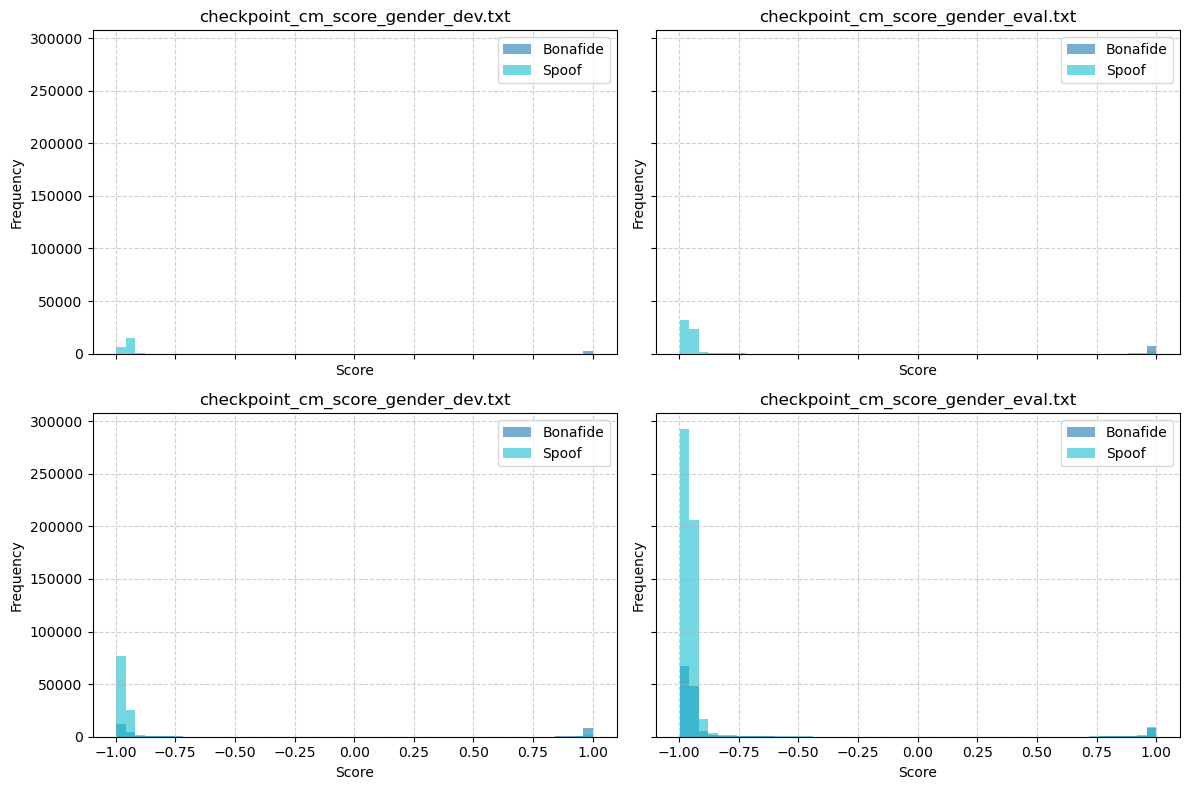

In [27]:
file_paths = [
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev.txt",
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_eval.txt",
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev.txt",
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_eval.txt"
]
plot_histogram_comparison(file_paths)

In [28]:
def compute_eer_from_text_file(file_path, threshold=None,gender = "all"):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                 names=["file_id", "speakers", "attack_type", "label", "score", "gender"])

    mapping_labels = {"bonafide": 1, "spoof": -1}

    df.label = df.label.map(mapping_labels)
    
    if gender == "male":
        df = df.loc[df["gender"] == "male"]
    
    if gender ==  "female":
        df = df.loc[df["gender"] == "female"]
        

    pred, labels , eer , misclassifications , misclassification_rate = [], [], [], [], []
    if threshold is None:
        
        eer, threshold = compute_eer( y= df.label.values, y_score = df.score.values)
    else:
        pred = (df.score.values > threshold).astype(int)
        labels = df.label.values 
    
    #misscalssification rate
        misclassifications = (pred != labels).sum()  # Count mismatches
        misclassification_rate = misclassifications / len(df)  # Rate
    
    
    return eer, threshold , pred , labels , misclassifications , misclassification_rate


# Define the path to the text file
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev.txt"

eer_dev, threshold_dev , _ , _ , _ , _ = compute_eer_from_text_file(file_path)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

eer_dev: 0.002747252747252806, threshold_dev: -0.7637985399174735


In [29]:
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt"

_, _ , pred , labels , misclassifications , misclassification_rate = compute_eer_from_text_file(file_path,threshold_dev)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

print(f"misclassifications: {misclassifications}")
print(f"misclassification_rate: {100*misclassification_rate}%")

eer_dev: 0.002747252747252806, threshold_dev: -0.7637985399174735
misclassifications: 7
misclassification_rate: 0.27472527472527475%


In [30]:
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"

_, _ , pred , labels , misclassifications , misclassification_rate = compute_eer_from_text_file(file_path,threshold_dev)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

print(f"misclassifications: {misclassifications}")
print(f"misclassification_rate: {100*misclassification_rate}%")

eer_dev: 0.002747252747252806, threshold_dev: -0.7637985399174735
misclassifications: 14
misclassification_rate: 0.1903467029231815%


In [31]:
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt"

_, _ , pred , labels , misclassifications , misclassification_rate = compute_eer_from_text_file(file_path,threshold_dev)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

print(f"misclassifications: {misclassifications}")
print(f"misclassification_rate: {100*misclassification_rate}%")

eer_dev: 0.002747252747252806, threshold_dev: -0.7637985399174735
misclassifications: 18832
misclassification_rate: 60.10084891810813%


In [32]:
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"

_, _ , pred , labels , misclassifications , misclassification_rate = compute_eer_from_text_file(file_path,threshold_dev)
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

print(f"misclassifications: {misclassifications}")
print(f"misclassification_rate: {100*misclassification_rate}%")

eer_dev: 0.002747252747252806, threshold_dev: -0.7637985399174735
misclassifications: 123977
misclassification_rate: 89.39273765574526%


### Plotting:

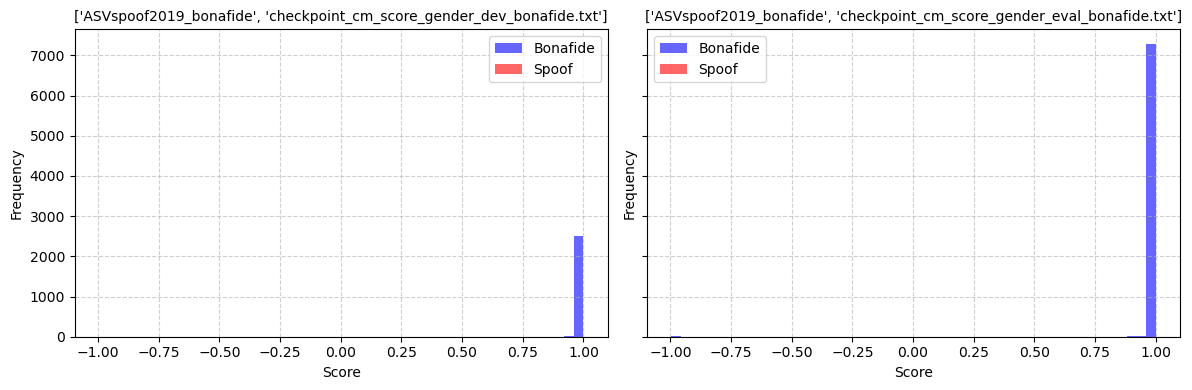

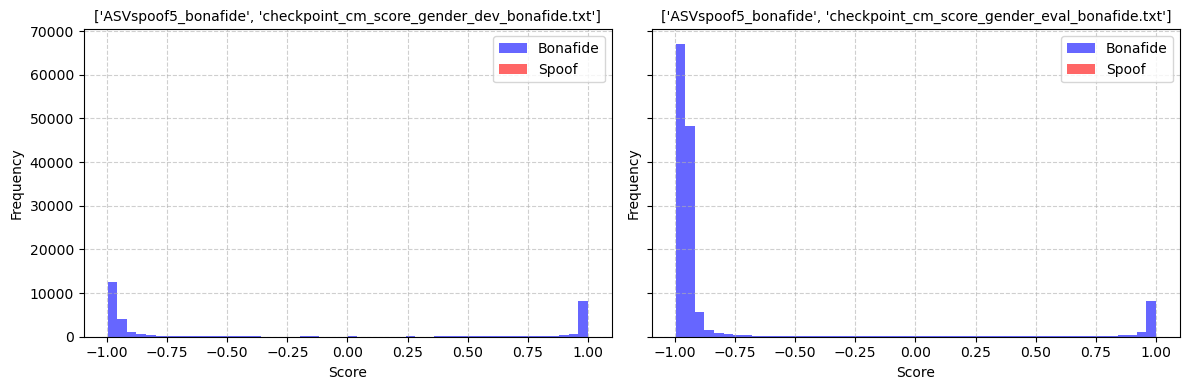

In [33]:


def plot_histogram_comparison(file_paths, gender="all"):
    num_files = len(file_paths)
    cols = 2  # Number of columns in the subplot grid
    rows = (num_files + cols - 1) // cols  # Calculate required rows
    unique_colors = plt.cm.get_cmap("tab10", num_files)

    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for idx, file_path in enumerate(file_paths):
        df = pd.read_csv(file_path, delim_whitespace=True, header=None,
                         names=["file_id", "speakers", "attack_type", "label", "score", "gender"])

        mapping_labels = {"bonafide": 1, "spoof": -1}
        df["label"] = df["label"].map(mapping_labels)

        if gender == "male":
            df = df.loc[df["gender"] == "male"]
        elif gender == "female":
            df = df.loc[df["gender"] == "female"]


        bonafide_scores = df[df["label"] == 1]["score"]
        spoof_scores = df[df["label"] == -1]["score"]
        # Plot histogram in the appropriate subplot
        axes[idx].hist(bonafide_scores, bins=50, alpha=0.6, color="blue", label="Bonafide")
        axes[idx].hist(spoof_scores, bins=50, alpha=0.6, color="red", label="Spoof")
        # axes[idx].hist(df["score"], bins=50, alpha=0.6, color=unique_colors(idx))
        axes[idx].set_title(file_path.split("/")[-2::], fontsize=10)
        axes[idx].set_xlabel("Score", fontsize=10)
        axes[idx].set_ylabel("Frequency", fontsize=10)
        axes[idx].grid(True, linestyle="--", alpha=0.6)
        axes[idx].legend()
        plt.tight_layout()
    # Hide any unused subplots
    for ax in axes[len(file_paths):]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()



# Example usage
file_paths = [
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt",
    "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"
]
plot_histogram_comparison(file_paths)

file_paths = [
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt",
    "./ASVspoof5_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"
    ]
plot_histogram_comparison(file_paths)

# With conf intervals:

In [34]:
# Percentage for the confidence interval
alpha = 5 

# Number of bootstrap samples to use (the run time will be proportional to this number). We set it to
# 50/alpha*100 to get enough samples in the tails.
num_bootstraps = int(50/alpha*100)

print(" Number of bootstraps: ", num_bootstraps)
print(" Alpha: ", alpha)

 Number of bootstraps:  1000
 Alpha:  5


In [35]:
def metric1(labels, scores):
    eer, threshold = compute_eer( y= labels, y_score = scores)
    return eer,threshold

def metric2(labels, scores):
    threshold_dev = -0.7637985381451311
    pred = (scores > threshold_dev).astype(int)
    misclassifications = (pred != labels).sum()  # Count mismatches
    misclassification_rate = misclassifications / len(labels)  # Rate   
    
    return misclassifications , 100*misclassification_rate
    

def compute_eer_from_text_file(file_path, threshold=None,gender = "all"):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                 names=["file_id", "speakers" ,"attack_type", "label", "score", "gender"])

    mapping_labels = {"bonafide": 1, "spoof": -1}

    df.label = df.label.map(mapping_labels)
    
    if gender == "male":
        df = df.loc[df["gender"] == "male"]
    
    if gender ==  "female":
        df = df.loc[df["gender"] == "female"]
    
    speakers = df["speakers"].values.astype(str)
    speakers_int = np.array([int(s[-4:]) for s in speakers])

    pred, labels , eer , res = [], [], [], []
    if threshold is None:
        speakers_int = None
        eer, threshold = evaluate_with_conf_int(samples =  df.score.values, metric = metric1, labels = df.label.values, 
                                              conditions = speakers_int, num_bootstraps=num_bootstraps, alpha=alpha)
    else:
        res = evaluate_with_conf_int(samples =  df.score.values, metric = metric2, labels = df.label.values, 
                                              conditions = speakers_int, num_bootstraps=num_bootstraps, alpha=alpha)
    
    
    return eer, threshold , pred , labels , res


# Define the path to the text file
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev.txt"

eer_dev_male, threshold_dev_male , _ , _ , _  = compute_eer_from_text_file(file_path,gender = "male")
print(f"Male: eer_dev: {eer_dev_male}, threshold_dev: {threshold_dev_male}")

eer_dev_female, threshold_dev_female , _ , _ , _ = compute_eer_from_text_file(file_path,gender = "female")
print(f"Female: eer_dev: {eer_dev_female}, threshold_dev: {threshold_dev_female}")

eer_dev, threshold_dev , _ , _ , _ = compute_eer_from_text_file(file_path,gender = "all")
print(f"eer_dev: {eer_dev}, threshold_dev: {threshold_dev}")

Male: eer_dev: (0.005411255411116735, array(-0.75675809)), threshold_dev: [(0.003536885662282277, 0.007694810731716051), (-0.8233057260550921, -0.4548098146899913)]
Female: eer_dev: (0.0017857142857142455, array(-0.77178321)), threshold_dev: [(0.0005938154175800659, 0.003036667772817226), (-0.8425731393361604, -0.3266697824393571)]
eer_dev: (0.002747252747252806, array(-0.76379854)), threshold_dev: [(0.001984825713206422, 0.004003483798534033), (-0.8136535883218837, -0.6318034941833556)]


In [36]:
# Define the path to the text file
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt"

_, _ ,pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "male")
print(f"Male misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "female")
print(f"Female misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "all")
print(f"misclassifications: {res}")


Male misclassifications: ((4, 0.4608294930875576), [(0.0, 14.024999999999977), (0.0, 1.769706089517831)])
Female misclassifications: ((3, 0.17857142857142858), [(0.0, 11.0), (0.0, 0.6270029582152097)])
misclassifications: ((7, 0.27472527472527475), [(0.0, 21.0), (0.0, 0.8555979174655614)])


In [37]:
# Define the path to the text file
file_path = "./ASVspoof2019_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"

_, _ ,pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "male")
print(f"Male misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "female")
print(f"Female misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "all")
print(f"misclassifications: {res}")

Male misclassifications: ((3, 0.1314060446780552), [(0.0, 10.0), (0.0, 0.4329004329004329)])
Female misclassifications: ((11, 0.2168769716088328), [(2.0, 26.0), (0.03867723844517501, 0.5123410741115414)])
misclassifications: ((14, 0.1903467029231815), [(3.0, 30.0), (0.041796345936625845, 0.391629121607746)])


In [38]:
# Define the path to the text file
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_dev_bonafide.txt"

_, _ ,pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "male")
print(f"Male misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "female")
print(f"Female misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "all")
print(f"misclassifications: {res}")

Male misclassifications: ((9212, 58.2779781109635), [(8598.875, 9805.0), (55.21945311081059, 61.3375679256153)])
Female misclassifications: ((9620, 61.956591743414705), [(8961.925, 10203.1), (59.00648954585195, 64.88088868317398)])
misclassifications: ((18832, 60.10084891810813), [(18009.95, 19645.0), (58.10362201482966, 62.204960519045684)])


In [39]:
# Define the path to the text file
file_path = "./ASVspoof5_bonafide/checkpoint_cm_score_gender_eval_bonafide.txt"

_, _ ,pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "male")
print(f"Male misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "female")
print(f"Female misclassifications: {res}")


_, _ , pred , labels , res = compute_eer_from_text_file(file_path,threshold_dev,gender = "all")
print(f"misclassifications: {res}")

Male misclassifications: ((60877, 88.93385145795594), [(59977.4, 61746.125), (88.05790855293851, 89.8962039964683)])
Female misclassifications: ((63100, 89.8399681075232), [(62205.85, 63986.125), (88.99579764355768, 90.67450621529558)])
misclassifications: ((123977, 89.39273765574526), [(122713.15, 125182.225), (88.77023097274375, 90.0432665749168)])
